In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"admission_data.csv")

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
df.shape

(500, 8)

In [19]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.duplicated().sum()

np.int64(0)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x=df.drop(columns='Chance of Admit ')
y=df['Chance of Admit ']

train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:

train_x.shape,train_y.shape, test_x.shape, test_y.shape

((400, 7), (400,), (100, 7), (100,))

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler=MinMaxScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [27]:
train_x

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [8]:
#!pip install tensorflow

# Kerastuner

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-10-30 07:48:14.554987: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-30 07:48:20.761314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-30 07:48:25.512363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730274509.477686    2025 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730274510.504867    2025 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-30 07:48:40.875640: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [12]:
#!pip install keras-tuner

In [14]:
import keras_tuner as kt

In [75]:
def build_model(hp):
    model=Sequential()

    counter=0
   
    for i in range( hp.Int('num_layers',1,10)):
        if counter==0:
            model.add(Dense(hp.Int('units' +str(i),8,128,step=8), 
                            activation=hp.Choice('activation' + str(i),['relu','leaky-relu','elu']),input_dim=7))
            
        else:
            model.add(Dense(hp.Int('units' +str(i),8,128,step=8), 
                            activation=hp.Choice('activation' + str(i),['relu','leaky-relu','elu'])))
        counter+=1

    model.add(Dense(1, activation='linear'))
     
    optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])


    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

In [77]:
tuner=kt.RandomSearch(build_model, objective='val_loss',max_trials=5, directory='mydir', project_name='project1')
tuner.search(train_x,train_y,epochs=5, validation_data=(test_x,test_y), verbose=1)

Trial 5 Complete [00h 00m 02s]
val_loss: 0.0045702215284109116

Best val_loss So Far: 0.0045702215284109116
Total elapsed time: 00h 00m 07s


In [78]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7,
 'units0': 24,
 'activation0': 'relu',
 'optimizer': 'rmsprop',
 'units1': 8,
 'activation1': 'elu',
 'units2': 8,
 'activation2': 'relu',
 'units3': 32,
 'activation3': 'elu',
 'units4': 120,
 'activation4': 'elu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu'}

In [80]:
model=tuner.get_best_models(num_models=1)[0]

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │         3,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,761 (22.50 KB)

 Trainable params: 5,761 (22.50 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.fit(train_x,train_y,epochs=300, initial_epoch=5, validation_data=(test_x,test_y))

Epoch 6/300


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - val_loss: 0.0060
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 13/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 14/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 15/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 16/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0045
Epoch 17/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - v

In [93]:
test_pred=model.predict(test_x)

from sklearn.metrics import r2_score
r2_score(test_y,test_pred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7697921025205299

# Without hyperpatameter tuning:

In [85]:
model2=Sequential()
model2.add(Dense(7,activation='relu',input_dim=7))
model2.add(Dense(14,activation='relu'))
model2.add(Dense(1,activation='linear'))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183 (732.00 B)

 Trainable params: 183 (732.00 B)

 Non-trainable params: 0 (0.00 B)

In [87]:
model2.compile(optimizer='Adam',loss='mean_squared_error')

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor='val_loss',patience=3)
history=model2.fit(train_x,train_y,epochs=200,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4210 - val_loss: 0.2501
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2959 - val_loss: 0.1477
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1830 - val_loss: 0.0876
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1114 - val_loss: 0.0619
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0877 - val_loss: 0.0552
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0711 - val_loss: 0.0516
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0665 - val_loss: 0.0455
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0557 - val_loss: 0.0386
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0456 - val_loss: 0.0326
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412 - val_loss: 0.0276
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321 - val_loss: 0.0238
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - val_l

In [89]:
test_pred=model2.predict(test_x)

from sklearn.metrics import r2_score
r2_score(test_y,test_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


0.8162164028249839

/tmp/ipykernel_5823/646815123.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


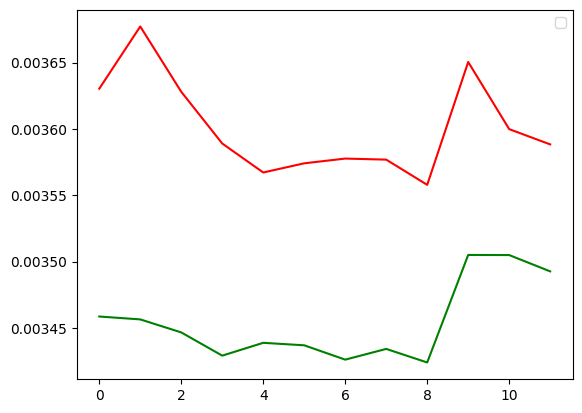

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.legend()
plt.show()